In [1]:
# Let's start by loading the dataset to understand its structure and contents.
import pandas as pd

# Load the dataset
file_path = '/Users/qbs/games.csv'
steam_games_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and contents
steam_games_data.head()


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [2]:
# Let's start with analyzing the impact of Steam game reviews.
# We'll look for columns related to reviews and sales/popularity.

# Identifying relevant columns for reviews and sales/popularity
relevant_columns = ['Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Price', 'DLC count']
review_related_columns = [col for col in steam_games_data.columns if 'review' in col.lower()]
relevant_columns.extend(review_related_columns)

# Filter the dataset for relevant columns
filtered_data = steam_games_data[relevant_columns]

# Display the first few rows of the filtered data to understand the review-related data
filtered_data.head()


,Name,Release date,Estimated owners,Peak CCU,Price,DLC count,Reviews
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,19.99,0,NaN
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0.99,0,NaN
2,Jolt Project,"Nov 17, 2021",0 - 20000,0,4.99,0,NaN
3,Henosis™,"Jul 23, 2020",0 - 20000,0,5.99,0,NaN
4,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0.00,0,NaN


In [3]:
# Checking the amount of missing data in the 'Reviews' column
missing_reviews = filtered_data['Reviews'].isna().sum()
total_rows = filtered_data.shape[0]

# Calculating the percentage of missing review data
percentage_missing_reviews = (missing_reviews / total_rows) * 100

missing_reviews, percentage_missing_reviews


(62549, 87.21763623180323)

In [6]:
# Reapplying the conversion of the 'Estimated owners' column to a numeric format for the entire dataset

# Function to convert 'Estimated owners' to a numeric value
def estimate_owners_to_numeric(owners):
    if '-' in owners:
        low, high = owners.split(' - ')
        return (int(low) + int(high)) / 2
    else:
        return int(owners)

# Apply the function to the entire dataset
steam_games_data['Estimated owners numeric'] = steam_games_data['Estimated owners'].apply(estimate_owners_to_numeric)

# Now, let's redo the correlation analysis
correlation_matrix_full = steam_games_data[['Peak CCU', 'Price', 'DLC count', 'Estimated owners numeric']].corr()

correlation_matrix_full



,Peak CCU,Price,DLC count,Estimated owners numeric
Peak CCU,1.000000,0.039669,0.009235,0.542448
Price,0.039669,1.000000,0.050423,0.041341
DLC count,0.009235,0.050423,1.000000,0.025203
Estimated owners numeric,0.542448,0.041341,0.025203,1.000000


In [8]:
pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.8 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Data Preparation for ARM
# We will use the 'Genres' column for this example. This process can be applied to other categorical columns like 'Tags' or 'Categories' as well.

# Splitting the 'Genres' column into a list of genres for each game
genres_list = steam_games_data['Genres'].dropna().apply(lambda x: x.split(','))

# Using TransactionEncoder to transform the data into a format suitable for ARM
te = TransactionEncoder()
te_ary = te.fit(genres_list).transform(genres_list)
genres_df = pd.DataFrame(te_ary, columns=te.columns_)

# Displaying the transformed data
genres_df.head()


,360 Video,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Documentary,Early Access,...,Short,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Custom implementation for preparing data for ARM analysis

# Function to transform 'Genres' column into a list of genres for each game
def transform_genres(genres_str):
    return genres_str.split(',') if pd.notna(genres_str) else []

# Apply the function to the 'Genres' column
transformed_genres = steam_games_data['Genres'].apply(transform_genres)

# Displaying the first few transformed entries
transformed_genres.head()


0                 [Casual, Indie, Sports]
1                         [Action, Indie]
2    [Action, Adventure, Indie, Strategy]
3              [Adventure, Casual, Indie]
4                      [Adventure, Indie]
Name: Genres, dtype: object

In [11]:
from itertools import combinations
from collections import Counter

# Counting the occurrences of individual genres and pairs of genres
genre_counts = Counter()
pair_counts = Counter()

for genre_list in transformed_genres:
    genre_counts.update(genre_list)
    pair_counts.update(combinations(genre_list, 2))

# Most common individual genres
most_common_genres = genre_counts.most_common(10)

# Most common pairs of genres
most_common_pairs = pair_counts.most_common(10)

most_common_genres, most_common_pairs


([('Indie', 48827),
  ('Action', 28870),
  ('Casual', 28817),
  ('Adventure', 26634),
  ('Simulation', 13590),
  ('Strategy', 13218),
  ('RPG', 12079),
  ('Early Access', 8337),
  ('Free to Play', 5638),
  ('Sports', 3184)],
 [(('Casual', 'Indie'), 22038),
  (('Action', 'Indie'), 21970),
  (('Adventure', 'Indie'), 20328),
  (('Action', 'Adventure'), 12413),
  (('Adventure', 'Casual'), 10206),
  (('Indie', 'Simulation'), 9456),
  (('Indie', 'Strategy'), 9370),
  (('Action', 'Casual'), 9199),
  (('Indie', 'RPG'), 8787),
  (('Adventure', 'RPG'), 6987)])

In [13]:
pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


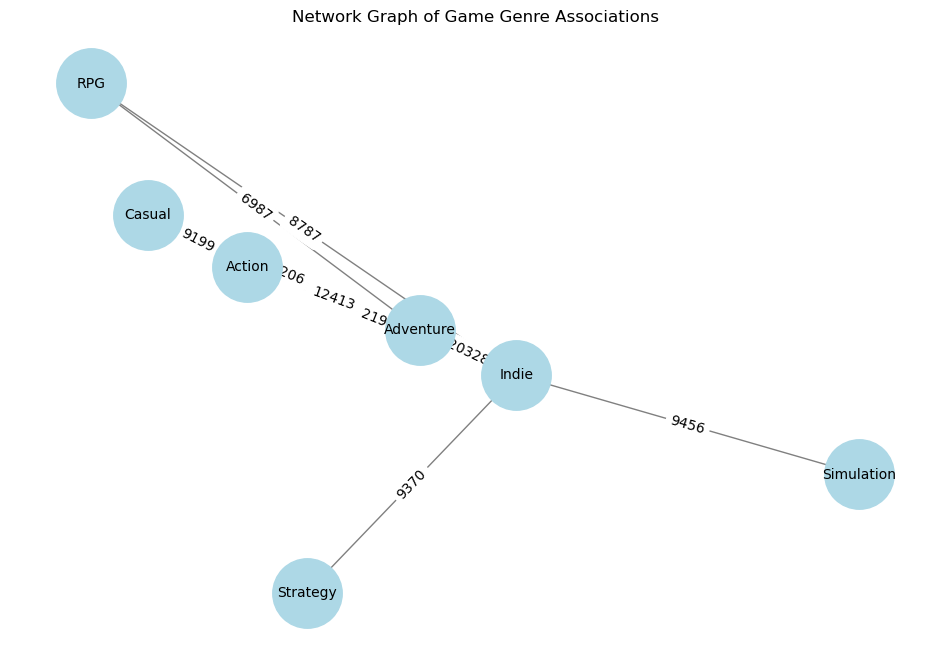

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a network graph based on the most common pairs of genres
G = nx.Graph()

# Adding nodes (genres) and edges (co-occurrences) to the graph
for pair, count in most_common_pairs:
    genre1, genre2 = pair
    G.add_edge(genre1, genre2, weight=count)

# Visualization of the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw_networkx(G, pos, node_color='lightblue', with_labels=True, node_size=2500, 
                 edge_color='grey', linewidths=1.0, font_size=10)

# Display edge weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Network Graph of Game Genre Associations")
plt.axis('off')
plt.show()
